In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/Sleep_health_and_lifestyle_dataset.csv
/kaggle/input/final-dataset/final_dataset.csv
/kaggle/input/cleaned-dataset/augumented_dataset.csv


In [2]:
import pandas as pd

In [3]:
# Load your dataset
df = pd.read_csv('/kaggle/input/cleaned-dataset/augumented_dataset.csv')

df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Blood Pressure,Heart Rate
0,1,Male,27,Software Engineer,6.1,6,6,Overweight,126/83,77
1,2,Male,28,Doctor,6.2,6,8,Normal,125/80,75
2,3,Male,28,Doctor,6.2,6,8,Normal,125/80,75
3,4,Male,28,Sales Representative,5.9,4,8,Obese,140/90,85
4,5,Male,28,Sales Representative,5.9,4,8,Obese,140/90,85
...,...,...,...,...,...,...,...,...,...,...
5979,5980,Female,63,Lawyer,8.9,10,3,Normal,147/97,64
5980,5981,Male,50,Lawyer,7.4,9,2,Overweight,143/91,64
5981,5982,Male,62,Scientist,8.2,10,3,Normal,129/77,74
5982,5983,Male,61,Engineer,7.5,9,3,Overweight,196/71,58


In [4]:
df.Occupation.unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [5]:
df.columns.tolist()

['Person ID',
 'Gender',
 'Age',
 'Occupation',
 'Sleep Duration',
 'Quality of Sleep',
 'Stress Level',
 'BMI Category',
 'Blood Pressure',
 'Heart Rate']

In [6]:
# Remove columns
df = df.drop(columns=['Occupation'])

df

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Blood Pressure,Heart Rate
0,1,Male,27,6.1,6,6,Overweight,126/83,77
1,2,Male,28,6.2,6,8,Normal,125/80,75
2,3,Male,28,6.2,6,8,Normal,125/80,75
3,4,Male,28,5.9,4,8,Obese,140/90,85
4,5,Male,28,5.9,4,8,Obese,140/90,85
...,...,...,...,...,...,...,...,...,...
5979,5980,Female,63,8.9,10,3,Normal,147/97,64
5980,5981,Male,50,7.4,9,2,Overweight,143/91,64
5981,5982,Male,62,8.2,10,3,Normal,129/77,74
5982,5983,Male,61,7.5,9,3,Overweight,196/71,58


In [7]:
# Save the cleaned dataset to the working directory
df.to_csv('/kaggle/working/final_dataset.csv', index=False)

In [8]:
# Load your dataset
df_1 = pd.read_csv('/kaggle/input/final-dataset/final_dataset.csv')

df_1.columns.tolist()

['Person ID',
 'Gender',
 'Age',
 'Sleep Duration',
 'Quality of Sleep',
 'Stress Level',
 'BMI Category',
 'Blood Pressure',
 'Heart Rate']

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Gender' column
df_1['Gender_encoded'] = label_encoder.fit_transform(df_1['Gender'])

# Apply label encoding to the 'BMI Category' column
df_1['BMI_Category_encoded'] = label_encoder.fit_transform(df_1['BMI Category'])

# Display the first few rows of the dataset to see the encoded column
df_1

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Blood Pressure,Heart Rate,Gender_encoded,BMI_Category_encoded
0,1,Male,27,6.1,6,6,Overweight,126/83,77,1,3
1,2,Male,28,6.2,6,8,Normal,125/80,75,1,0
2,3,Male,28,6.2,6,8,Normal,125/80,75,1,0
3,4,Male,28,5.9,4,8,Obese,140/90,85,1,2
4,5,Male,28,5.9,4,8,Obese,140/90,85,1,2
...,...,...,...,...,...,...,...,...,...,...,...
5979,5980,Female,63,8.9,10,3,Normal,147/97,64,0,0
5980,5981,Male,50,7.4,9,2,Overweight,143/91,64,1,3
5981,5982,Male,62,8.2,10,3,Normal,129/77,74,1,0
5982,5983,Male,61,7.5,9,3,Overweight,196/71,58,1,3


In [11]:
# Split the 'Blood Pressure' column into two new columns
df_1[['Systolic_BP', 'Diastolic_BP']] = df_1['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns from string to numeric types, if necessary
df_1['Systolic_BP'] = pd.to_numeric(df_1['Systolic_BP'])
df_1['Diastolic_BP'] = pd.to_numeric(df_1['Diastolic_BP'])

df_1

,Person ID,Gender,Age,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Blood Pressure,Heart Rate,Gender_encoded,BMI_Category_encoded,Systolic_BP,Diastolic_BP
0,1,Male,27,6.1,6,6,Overweight,126/83,77,1,3,126,83
1,2,Male,28,6.2,6,8,Normal,125/80,75,1,0,125,80
2,3,Male,28,6.2,6,8,Normal,125/80,75,1,0,125,80
3,4,Male,28,5.9,4,8,Obese,140/90,85,1,2,140,90
4,5,Male,28,5.9,4,8,Obese,140/90,85,1,2,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5979,5980,Female,63,8.9,10,3,Normal,147/97,64,0,0,147,97
5980,5981,Male,50,7.4,9,2,Overweight,143/91,64,1,3,143,91
5981,5982,Male,62,8.2,10,3,Normal,129/77,74,1,0,129,77
5982,5983,Male,61,7.5,9,3,Overweight,196/71,58,1,3,196,71


In [12]:
df_1.dtypes

Person ID                 int64
Gender                   object
Age                       int64
Sleep Duration          float64
Quality of Sleep          int64
Stress Level              int64
BMI Category             object
Blood Pressure           object
Heart Rate                int64
Gender_encoded            int64
BMI_Category_encoded      int64
Systolic_BP               int64
Diastolic_BP              int64
dtype: object

In [13]:
# Remove columns
df_1 = df_1.drop(columns=['Gender', 'BMI Category', 'Blood Pressure'])

df_1

,Person ID,Age,Sleep Duration,Quality of Sleep,Stress Level,Heart Rate,Gender_encoded,BMI_Category_encoded,Systolic_BP,Diastolic_BP
0,1,27,6.1,6,6,77,1,3,126,83
1,2,28,6.2,6,8,75,1,0,125,80
2,3,28,6.2,6,8,75,1,0,125,80
3,4,28,5.9,4,8,85,1,2,140,90
4,5,28,5.9,4,8,85,1,2,140,90
...,...,...,...,...,...,...,...,...,...,...
5979,5980,63,8.9,10,3,64,0,0,147,97
5980,5981,50,7.4,9,2,64,1,3,143,91
5981,5982,62,8.2,10,3,74,1,0,129,77
5982,5983,61,7.5,9,3,58,1,3,196,71


In [14]:
# # Save the cleaned dataset to the working directory
# df_1.to_csv('/kaggle/working/final_dataset_1.csv', index=False)

Model Training

Using RandomForestClassifier

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # or use RandomForestRegressor for numerical targets
from sklearn.metrics import accuracy_score  # or mean_squared_error for regression

In [16]:
# Features and target
X = df_1[['Age', 'Gender_encoded', 'Sleep Duration', 'Stress Level', 'BMI_Category_encoded', 'Heart Rate', 'Systolic_BP', 'Diastolic_BP']]
y = df_1['Quality of Sleep']  # Ensure this column is prepared appropriately

In [17]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier(max_features='sqrt', random_state=42)  # Change to RandomForestRegressor if y is continuous
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Predict and evaluate
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))  # Change to mean_squared_error for regression

Accuracy: 0.39515455304928987


Using RandomForestRegressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [20]:
# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.1579878028404345


Hyperparameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 4, 10],
    'max_features': ['sqrt', 'log2']  # Correct usage as per new guidelines
}

In [24]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 4, 10],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=1)

In [25]:
# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100}
Best accuracy: 0.4228074423596704


Using a GBM model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [27]:
# Prepare data
X = df_1.drop(['Person ID', 'Quality of Sleep'], axis=1)  # Drop 'Person ID' and target variable
y = df_1['Quality of Sleep']

In [28]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the GBM model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gbm_model.predict(X_test)

In [29]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.118223651786248


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [31]:
# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 400),
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'subsample': [0.6, 0.8, 1.0]
}

In [32]:
# Initialize the GBM model
gbm = GradientBoostingRegressor(random_state=42)

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=gbm, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, scoring='neg_mean_squared_error')

In [33]:
# Fit the random search to the data
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score (MSE):", -random_search.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END learning_rate=0.2, max_depth=6, min_samples_leaf=8, min_samples_split=6, n_estimators=202, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.2, max_depth=6, min_samples_leaf=8, min_samples_split=6, n_estimators=202, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.2, max_depth=6, min_samples_leaf=8, min_samples_split=6, n_estimators=202, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=8, min_samples_split=6, n_estimators=199, subsample=1.0; total time=   1.6s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=8, min_samples_split=6, n_estimators=199, subsample=1.0; total time=   1.6s
[CV] END learning_rate=0.2, max_depth=9, min_samples_leaf=8, min_samples_split=6, n_estimators=199, subsample=1.0; total time=   1.6s
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=2, min_samples_split=9, n_estimators=393, subsample=0.8; total time=   2.4s

In [34]:
# Use the best estimator to make predictions
y_pred = random_search.best_estimator_.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Refined Mean Squared Error: {mse}")

Refined Mean Squared Error: 1.1203841510824142


Using a SVC Model:

In [35]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [36]:
# Load and prepare the data
X = df_1.drop(['Person ID', 'Quality of Sleep'], axis=1)
y = df_1['Quality of Sleep']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Initialize the SVC model
svc = SVC()

# Set up parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Type of kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

In [38]:
# Grid search for best parameters and model
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.4s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.5s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.5s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.5s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.5s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.7s
[CV] END .....................C=0.1, gamma=scal

In [39]:
# Use the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4319131161236424


In [40]:
# Load your dataset
df_2 = pd.read_csv('/kaggle/input/dataset/Sleep_health_and_lifestyle_dataset.csv')

df_2

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [41]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Gender' column
df_2['Gender_encoded'] = label_encoder.fit_transform(df_2['Gender'])

# Apply label encoding to the 'BMI Category' column
df_2['BMI_Category_encoded'] = label_encoder.fit_transform(df_2['BMI Category'])

# Display the first few rows of the dataset to see the encoded column
df_2

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Gender_encoded,BMI_Category_encoded
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,1,3
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1,0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1,0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,2
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0,3
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0,3
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0,3
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0,3


In [42]:
# Split the 'Blood Pressure' column into two new columns
df_2[['Systolic_BP', 'Diastolic_BP']] = df_2['Blood Pressure'].str.split('/', expand=True)

# Convert the new columns from string to numeric types, if necessary
df_2['Systolic_BP'] = pd.to_numeric(df_2['Systolic_BP'])
df_2['Diastolic_BP'] = pd.to_numeric(df_2['Diastolic_BP'])

df_2

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Gender_encoded,BMI_Category_encoded,Systolic_BP,Diastolic_BP
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,1,3,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1,0,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,1,0,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,2,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,1,2,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0,3,140,95
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0,3,140,95
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0,3,140,95
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea,0,3,140,95


In [43]:
# Remove columns
df_2 = df_2.drop(columns=['Gender', 'Occupation', 'Physical Activity Level', 'BMI Category', 'Blood Pressure', 'Daily Steps', 'Sleep Disorder'])

df_2

,Person ID,Age,Sleep Duration,Quality of Sleep,Stress Level,Heart Rate,Gender_encoded,BMI_Category_encoded,Systolic_BP,Diastolic_BP
0,1,27,6.1,6,6,77,1,3,126,83
1,2,28,6.2,6,8,75,1,0,125,80
2,3,28,6.2,6,8,75,1,0,125,80
3,4,28,5.9,4,8,85,1,2,140,90
4,5,28,5.9,4,8,85,1,2,140,90
...,...,...,...,...,...,...,...,...,...,...
369,370,59,8.1,9,3,68,0,3,140,95
370,371,59,8.0,9,3,68,0,3,140,95
371,372,59,8.1,9,3,68,0,3,140,95
372,373,59,8.1,9,3,68,0,3,140,95


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # or use RandomForestRegressor for numerical targets
from sklearn.metrics import accuracy_score  # or mean_squared_error for regression

In [45]:
# Features and target
X = df_2[['Age', 'Gender_encoded', 'Sleep Duration', 'Stress Level', 'BMI_Category_encoded', 'Heart Rate', 'Systolic_BP', 'Diastolic_BP']]
y = df_2['Quality of Sleep']  # Ensure this column is prepared appropriately

In [46]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier(max_features='sqrt', random_state=42)  # Change to RandomForestRegressor if y is continuous
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
# Predict and evaluate
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))  # Change to mean_squared_error for regression

Accuracy: 1.0


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [49]:
# Prepare data
X = df_2.drop(['Person ID', 'Quality of Sleep'], axis=1)  # Drop 'Person ID' and target variable
y = df_2['Quality of Sleep']

In [50]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the GBM model
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gbm_model.predict(X_test)

In [51]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.008735743919530222


Plotting Graphs

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
import numpy as np

Graph 1

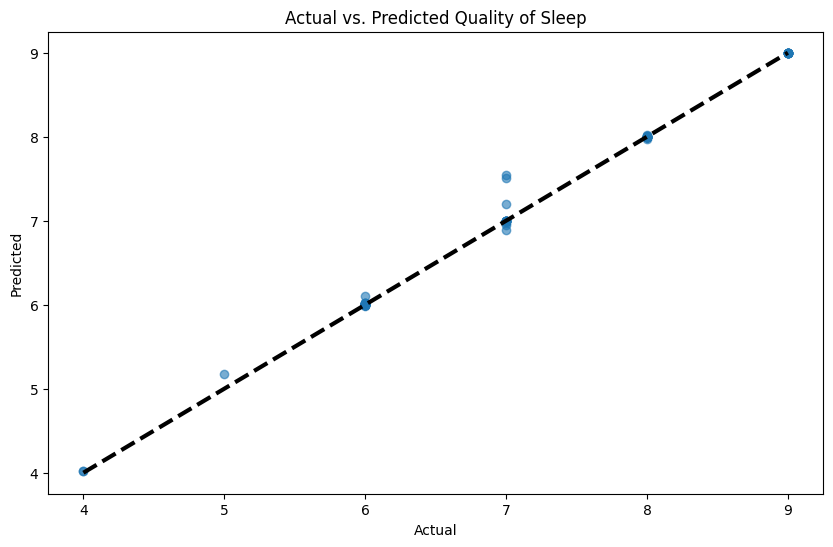

In [53]:
# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)  # Line showing perfect predictions
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Quality of Sleep')
plt.show()

Graph 2

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


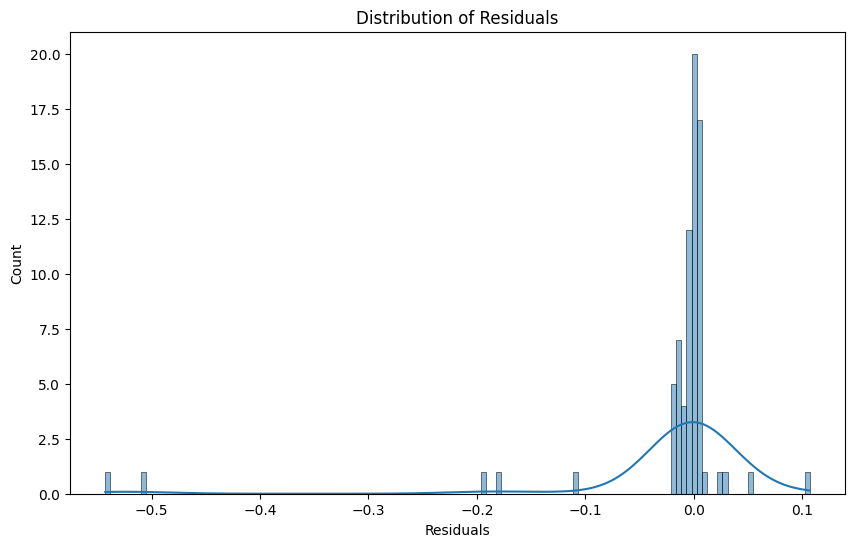

In [54]:
# Plotting residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

Graph 3

In [55]:
train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42), 
    X, y, cv=10, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10))

# Mean and standard deviation of train and test score
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

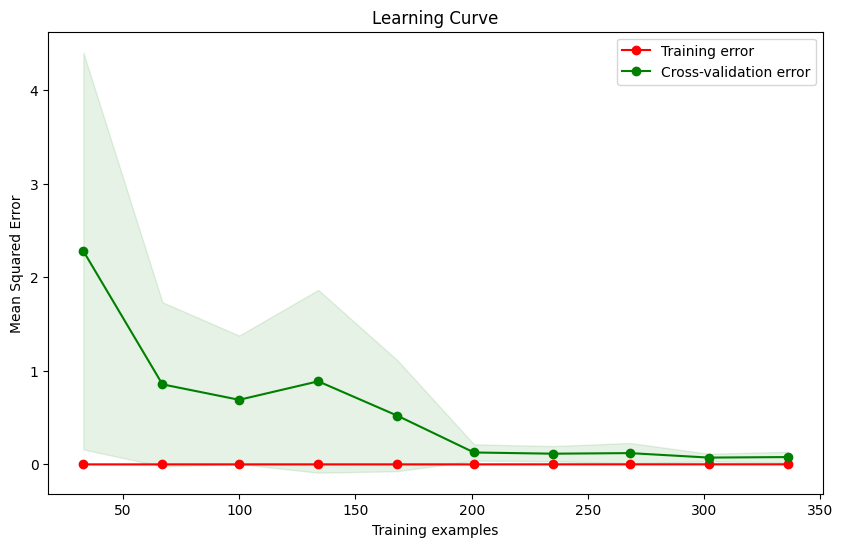

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training error")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation error")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

Graph 4

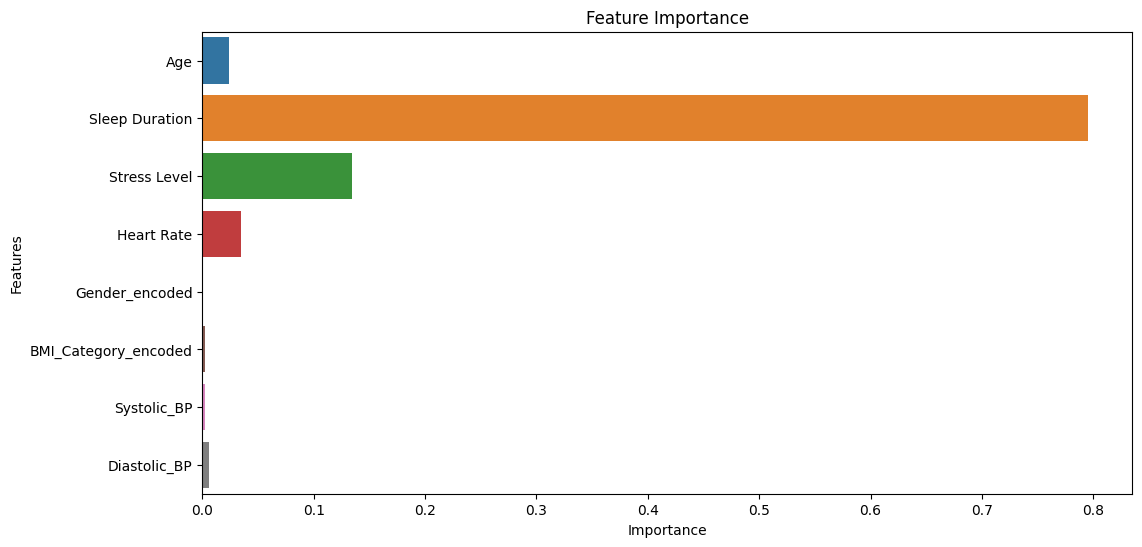

In [57]:
feature_importances = gbm_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Graph 5

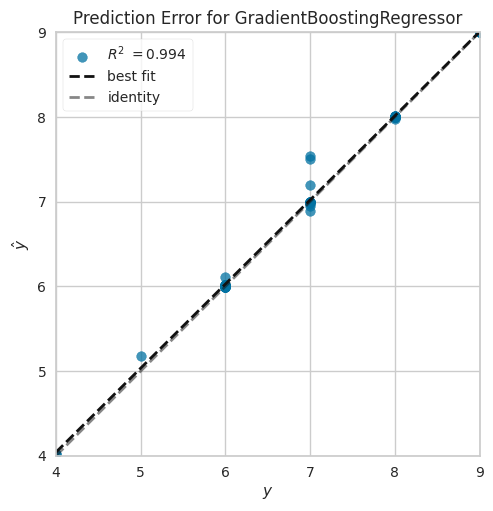

<Axes: title={'center': 'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [58]:
from yellowbrick.regressor import PredictionError

# Visualize the performance of the regression model
visualizer = PredictionError(GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

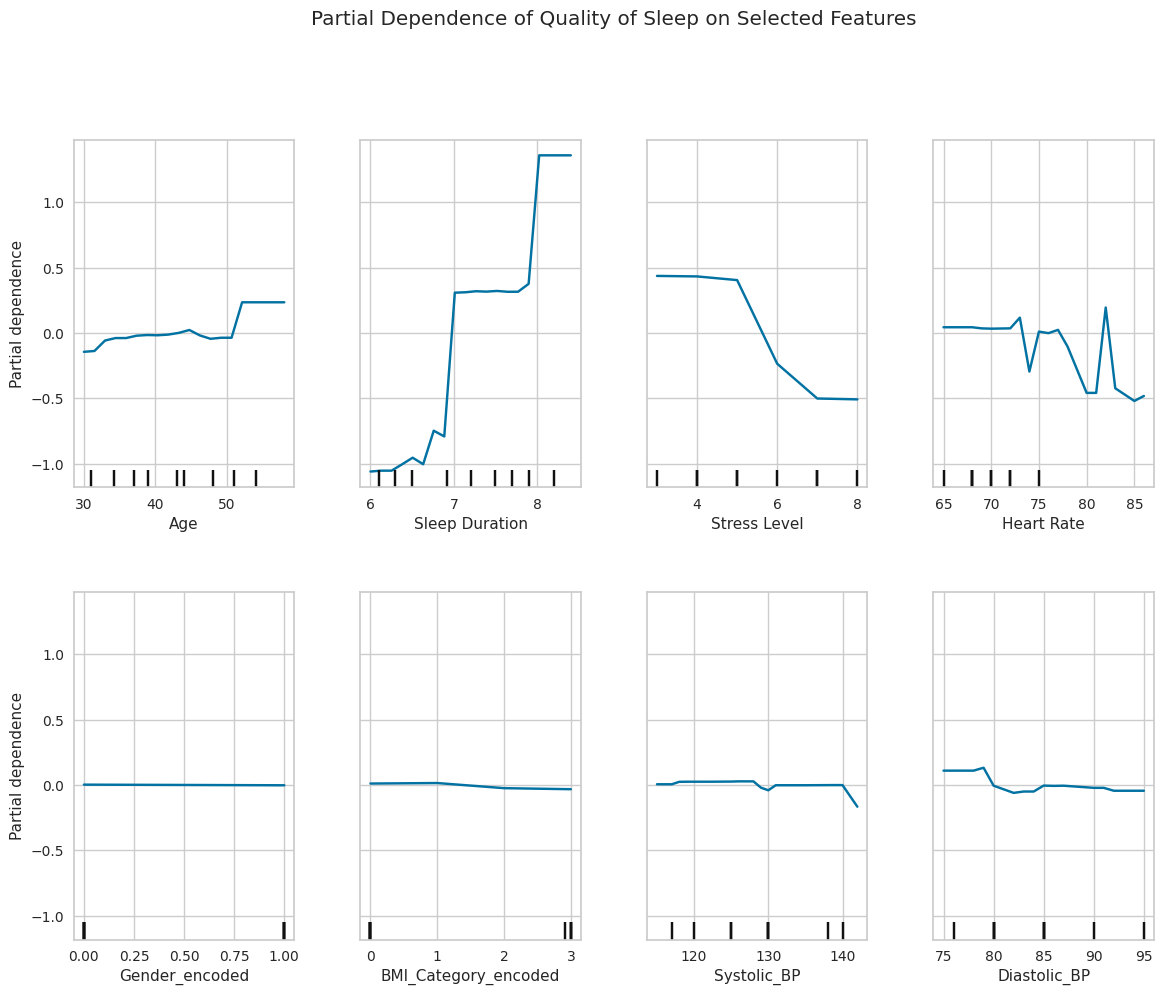

In [59]:
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 10))
features = [0, 1, 2, 3, 4, 5, 6, 7]  # Update feature indices as necessary

# Create the partial dependence display
display = PartialDependenceDisplay.from_estimator(
    gbm_model, X_train, features, grid_resolution=20, ax=ax, n_cols=4)  # Adjust n_cols as needed for layout

# Add overall title
plt.suptitle('Partial Dependence of Quality of Sleep on Selected Features')

# Adjust spacing to prevent overlap
fig.subplots_adjust(left=0.05, right=0.95, top=0.85, bottom=0.05, hspace=0.3, wspace=0.3)

plt.show()